✅ Percentage of Restaurants Offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

✅ Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

⭐ Average Ratings Based on Table Booking Availability:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

📦 Online Delivery Availability by Price Range:
Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


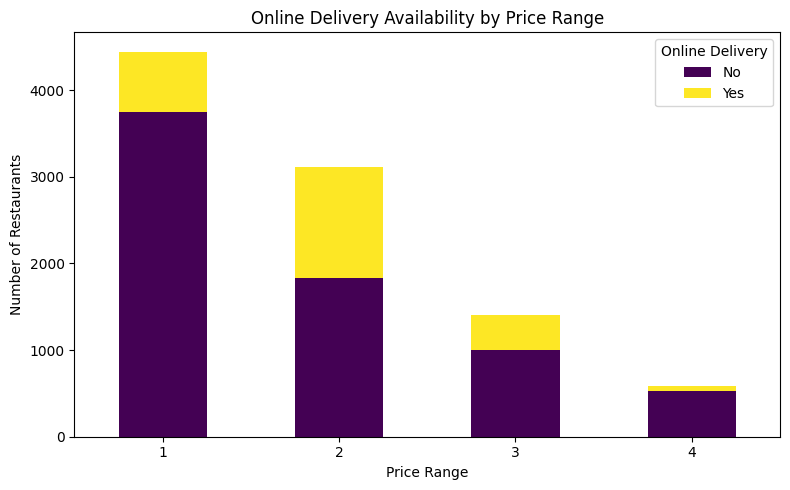

In [9]:
import pandas as pd


df = pd.read_csv('Dataset .csv')

df_cleaned = df.dropna(subset=['Has Table booking', 'Has Online delivery', 'Aggregate rating', 'Price range'])


print("✅ Percentage of Restaurants Offering Table Booking:")
print(df_cleaned['Has Table booking'].value_counts(normalize=True) * 100)

print("\n✅ Percentage of Restaurants Offering Online Delivery:")
print(df_cleaned['Has Online delivery'].value_counts(normalize=True) * 100)


print("\n⭐ Average Ratings Based on Table Booking Availability:")
print(df_cleaned.groupby('Has Table booking')['Aggregate rating'].mean())


print("\n📦 Online Delivery Availability by Price Range:")
delivery_by_price = df_cleaned.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)
print(delivery_by_price)


import matplotlib.pyplot as plt

delivery_by_price.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery')
plt.tight_layout()
plt.show()


✅ Most Common Price Range: 1

⭐ Average Rating by Price Range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-10-3756158697.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette='coolwarm')


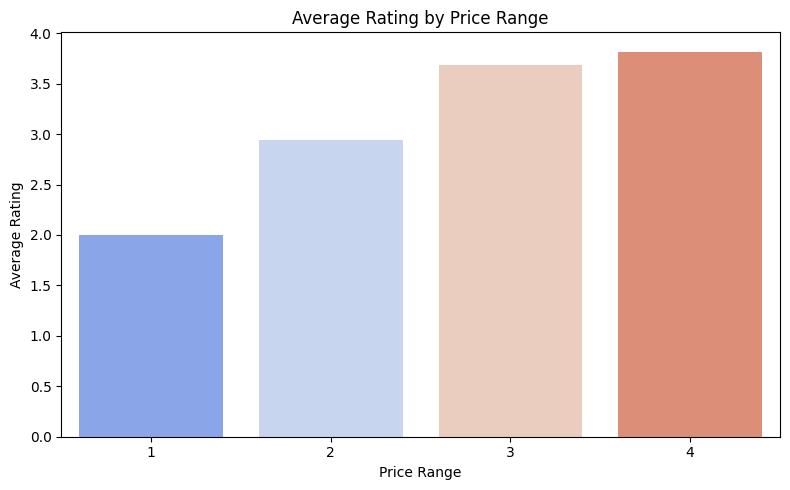


🎨 Rating Color with Highest Average Rating: Dark Green


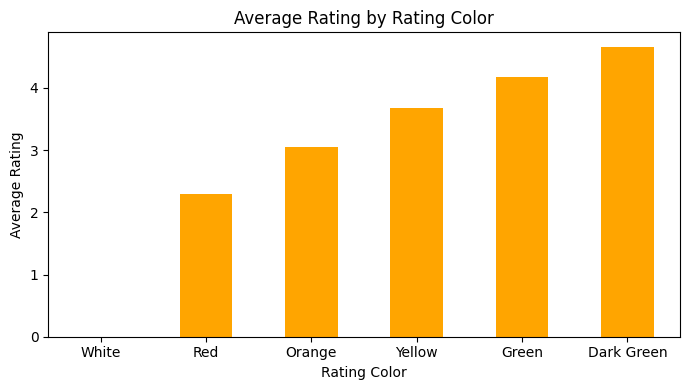

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dataset .csv')


df_cleaned = df.dropna(subset=['Price range', 'Aggregate rating'])


most_common_price = df_cleaned['Price range'].mode()[0]
print("✅ Most Common Price Range:", most_common_price)


avg_rating_by_price = df_cleaned.groupby('Price range')['Aggregate rating'].mean().sort_index()
print("\n⭐ Average Rating by Price Range:\n", avg_rating_by_price)


plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette='coolwarm')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


if 'Rating color' in df_cleaned.columns:
    avg_rating_by_color = df_cleaned.groupby('Rating color')['Aggregate rating'].mean()
    top_color = avg_rating_by_color.idxmax()
    print("\n🎨 Rating Color with Highest Average Rating:", top_color)


    avg_rating_by_color.sort_values().plot(kind='bar', color='orange', figsize=(7, 4))
    plt.title('Average Rating by Rating Color')
    plt.ylabel('Average Rating')
    plt.xlabel('Rating Color')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ 'Rating color' column not found in the dataset.")


In [11]:
import pandas as pd


df = pd.read_csv('Dataset .csv')


if 'Restaurant Name' in df.columns:
    df['Name Length'] = df['Restaurant Name'].astype(str).apply(len)


if 'Address' in df.columns:
    df['Address Length'] = df['Address'].astype(str).apply(len)

print("✅ Sample of New Text Features:")
print(df[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head())


if 'Has Table booking' in df.columns:
    df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)


if 'Has Online delivery' in df.columns:
    df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

print("\n✅ Encoded Booking & Delivery Features:")
print(df[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())

df.to_csv('level2_task3_engineered.csv', index=False)
print("\n📁 Feature-engineered dataset saved as 'level2_task3_engineered.csv'")


✅ Sample of New Text Features:
          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  

✅ Encoded Booking & Delivery Features:
  Has Table booking  Has Table Booking Has Online delivery  \
0               Yes                  1                  No   
1               Yes                  1                  No   
2               Yes                  1                  No   
3 